In [1]:
import anndata
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors


In [2]:
# Load metadata
metadata_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'
metadata = pd.read_csv(metadata_path, index_col=0, sep="\t")

# Add Group and AnimalID to adata.obs
adata.obs['Group'] = metadata['Group']
adata.obs['AnimalID'] = metadata['AnimalID'].astype('category')
adata.obs['Year'] = metadata['Year'].astype(int)
adata.obs['Collection'] = metadata['Collection'].astype(int)
adata.obs

,leiden,Group,AnimalID,Year,Collection
cell,,,,,
4146045001PO3NC4G4C,0,Control,41460,2023,2
4129944963PO2NC4M1S,0,Stressed,41299,2023,1
4520844650PO1NC5A7S,2,Stressed,45208,2022,1
4146045001PO2NC3F4C,1,Control,41460,2023,2
4520844650PO2NC3B7S,2,Stressed,45208,2022,1
3905345005PO1NC2I1S,1,Stressed,39053,2023,1
4129944963PO1NC3N1S,0,Stressed,41299,2023,2
4211144957PO1NC3K4C,2,Control,42111,2023,1
4660644938PO2NC3A10C,1,Control,46606,2023,1


X shape: (46, 23803)
Group label shape: (46,)
t-test p-value: 6.916e-01


/tmp/ipykernel_1947047/1443107587.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


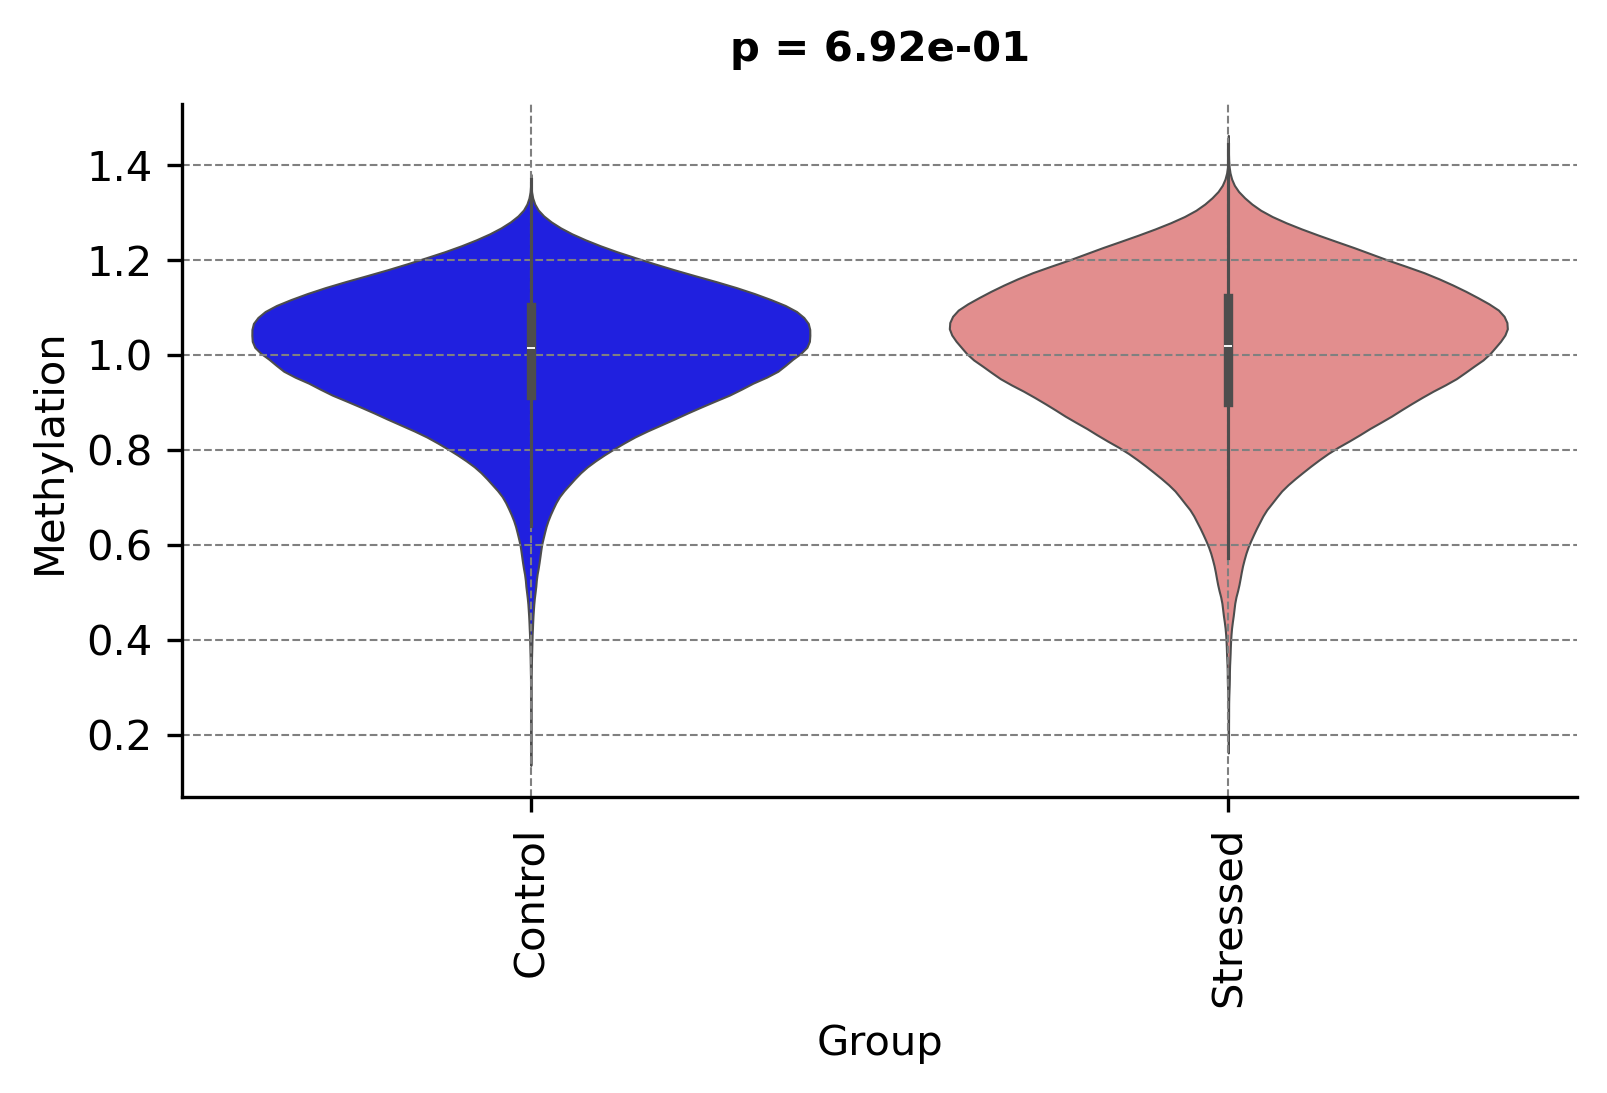

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. Extract cell-by-feature matrix
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X  # shape: (cells, features)

# 2. Get group labels per cell
group_labels = adata.obs['Group'].values
print("X shape:", X.shape)
print("Group label shape:", group_labels.shape)

# 3. Build long-format DataFrame with one row per (cell, feature)
df_long = pd.DataFrame(X)
df_long['Group'] = group_labels
df_long = df_long.melt(id_vars='Group', var_name='Feature', value_name='Methylation')

# 4. Compute t-test across all features (flattened)
control_vals = df_long[df_long['Group'] == 'Control']['Methylation']
stress_vals = df_long[df_long['Group'] == 'Stressed']['Methylation']
stat, pval = ttest_ind(control_vals, stress_vals, equal_var=False)
print(f"t-test p-value: {pval:.3e}")

# 5. Custom color palette: control = gray, stressed = pink
palette = {'Control': 'blue', 'Stressed': 'lightcoral'}

# 6. Plot violin plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.violinplot(
    data=df_long,
    x='Group',
    y='Methylation',
    density_norm='width',
    linewidth=0.5,
    cut=0,
    palette=palette,
    ax=ax
)

# Annotate with p-value
ax.text(
    0.5, 1.05, f'p = {pval:.2e}', transform=ax.transAxes,
    ha='center', va='bottom', fontsize=10, fontweight='bold'
)

ax.xaxis.set_tick_params(rotation=90)
ax.grid(linewidth=0.5, color='gray', linestyle='--')
sns.despine(ax=ax)

# Optional: Save the figure

os.makedirs("violin_globalmeth", exist_ok=True)
fig.savefig("violin_globalmeth/violin_feature_Globmethylation_per_group.png", bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:            Methylation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.704
Time:                        14:56:09   Log-Likelihood:             5.4546e+05
No. Observations:             1094938   AIC:                        -1.091e+06
Df Residuals:                 1094935   BIC:                        -1.091e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4112      0.57

/tmp/ipykernel_1947047/1798077632.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


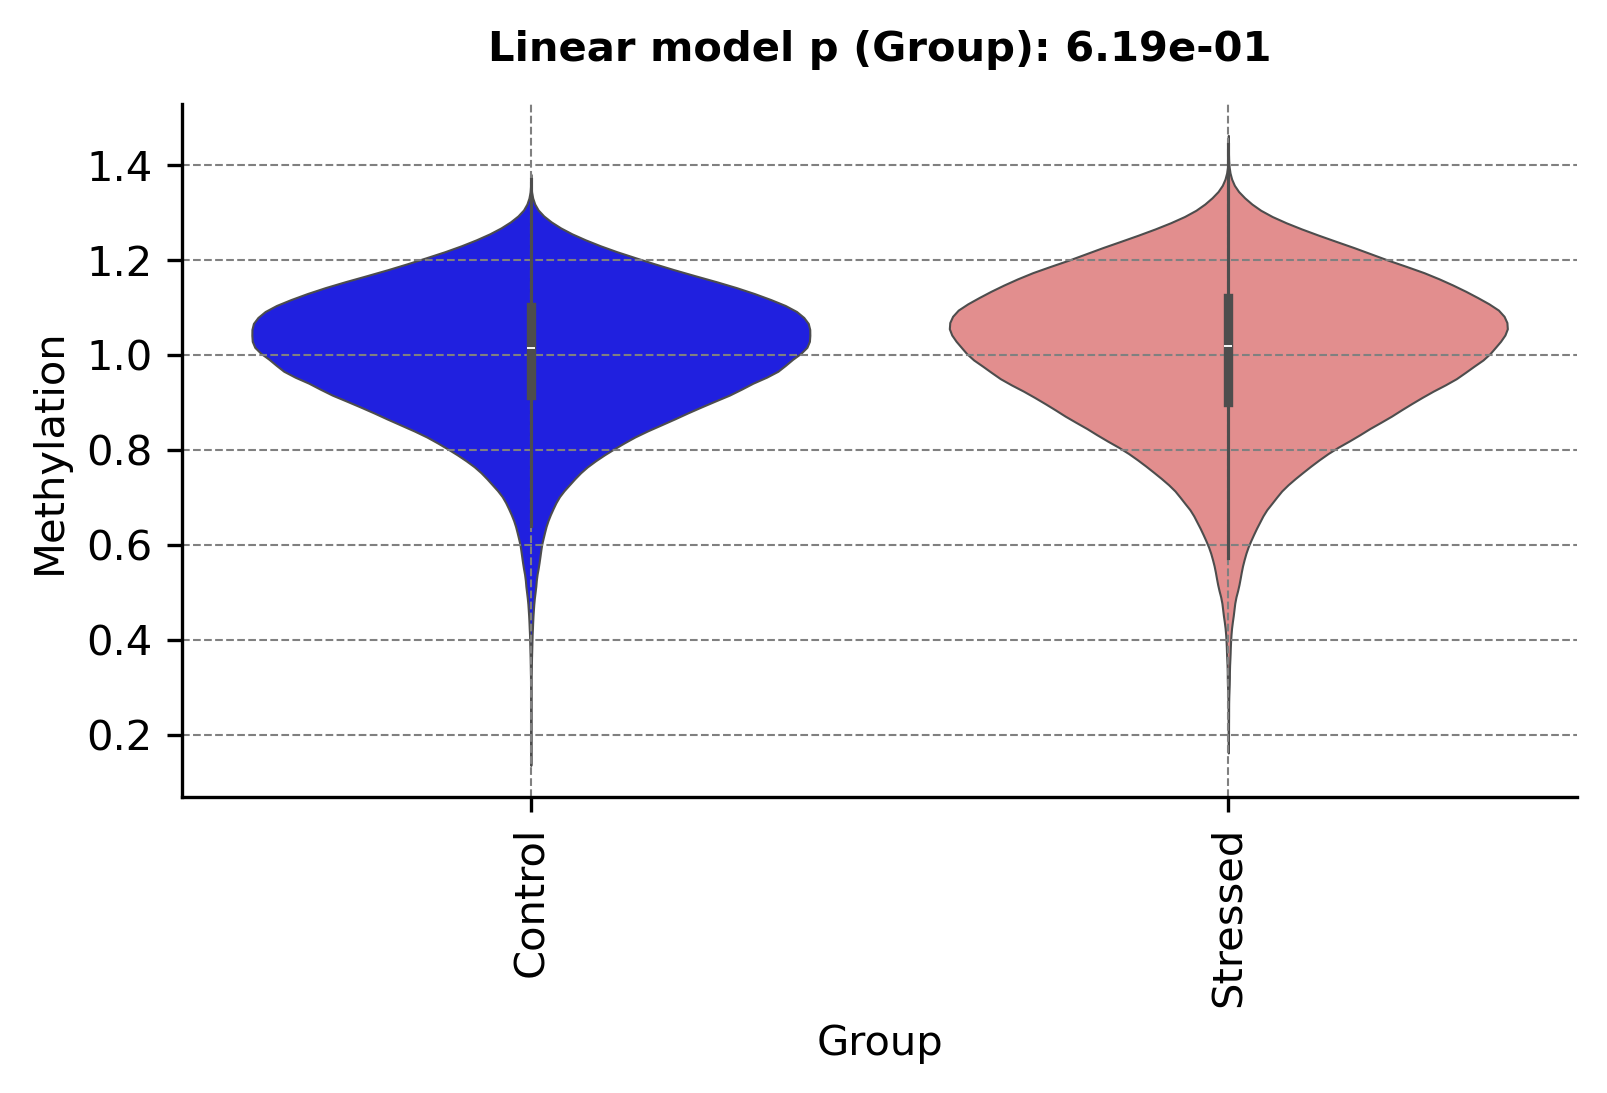

In [12]:
# adding year as covariant 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Extract cell-by-feature matrix
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X  # shape: (cells, features)

# 2. Get group and year per cell
group_labels = adata.obs['Group'].values
year_labels = adata.obs['Year'].values  # make sure 'Year' exists in adata.obs

# 3. Build long-format DataFrame with one row per (cell, feature)
df_long = pd.DataFrame(X)
df_long['Group'] = group_labels
df_long['Year'] = year_labels
df_long = df_long.melt(id_vars=['Group', 'Year'], var_name='Feature', value_name='Methylation')

# 4. Run linear model: Methylation ~ Group + Year
model = smf.ols('Methylation ~ Group + Year', data=df_long).fit()
pval = model.pvalues['Group[T.Stressed]']  # the effect of stress vs control

print(model.summary())  # optional

# 5. Custom color palette: control = gray, stressed = pink
palette = {'Control': 'blue', 'Stressed': 'lightcoral'}

# 6. Plot violin plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.violinplot(
    data=df_long,
    x='Group',
    y='Methylation',
    density_norm='width',
    linewidth=0.5,
    cut=0,
    palette=palette,
    ax=ax
)

# Annotate with adjusted p-value
ax.text(
    0.5, 1.05, f'Linear model p (Group): {pval:.2e}', transform=ax.transAxes,
    ha='center', va='bottom', fontsize=10, fontweight='bold'
)

ax.xaxis.set_tick_params(rotation=90)
ax.grid(linewidth=0.5, color='gray', linestyle='--')
sns.despine(ax=ax)

# Save if needed
# import os
# os.makedirs("violin_globalmeth", exist_ok=True)
fig.savefig("violin_globalmeth/violin_feature_Globmethylation_per_group_covariate_year.png", bbox_inches='tight')


                            OLS Regression Results                            
Dep. Variable:            Methylation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.704
Time:                        10:31:57   Log-Likelihood:             5.4546e+05
No. Observations:             1094938   AIC:                        -1.091e+06
Df Residuals:                 1094935   BIC:                        -1.091e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4112      0.57

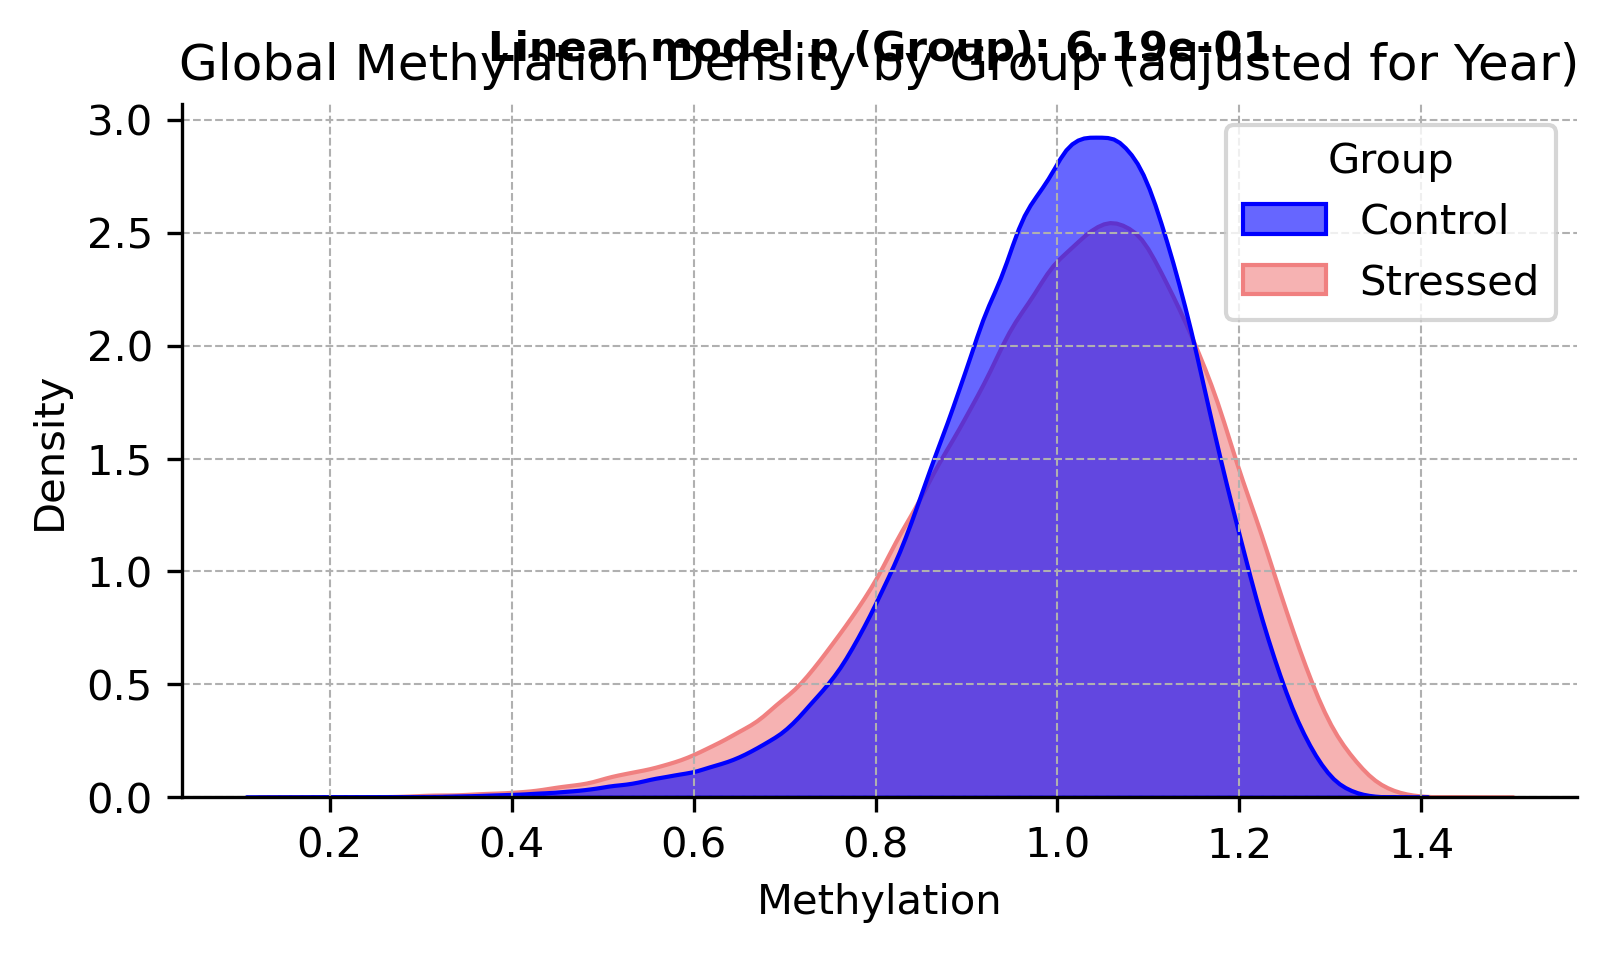

In [3]:
# Density plot: Group differences in methylation with 'Year' as covariate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Extract cell-by-feature matrix
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X  # shape: (cells, features)

# 2. Get group and year per cell
group_labels = adata.obs['Group'].values
year_labels = adata.obs['Year'].values

# 3. Convert to long-format DataFrame
df_long = pd.DataFrame(X)
df_long['Group'] = group_labels
df_long['Year'] = year_labels
df_long = df_long.melt(id_vars=['Group', 'Year'], var_name='Feature', value_name='Methylation')

# 4. Linear model: Test Group effect while controlling for Year
model = smf.ols('Methylation ~ Group + Year', data=df_long).fit()
pval = model.pvalues.get('Group[T.Stressed]', np.nan)

print(model.summary())  # Optional: print model results

# 5. Define color palette
palette = {'Control': 'blue', 'Stressed': 'lightcoral'}

# 6. Plot density plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.kdeplot(
    data=df_long,
    x='Methylation',
    hue='Group',
    palette=palette,
    common_norm=False,
    fill=True,
    alpha=0.6,
    linewidth=1,
    ax=ax
)

# Annotate with p-value
ax.text(
    0.5, 1.05, f'Linear model p (Group): {pval:.2e}', transform=ax.transAxes,
    ha='center', va='bottom', fontsize=10, fontweight='bold'
)

ax.set_title('Global Methylation Density by Group (adjusted for Year)')
ax.grid(True, linestyle='--', linewidth=0.5)
sns.despine(ax=ax)

# Save plot
# import os
# os.makedirs("violin_globalmeth", exist_ok=True)
fig.savefig("violin_globalmeth/density_feature_Globmethylation_per_group_covariate_year.png", bbox_inches='tight')


X shape: (46, 23803)
Group label shape: (46,)


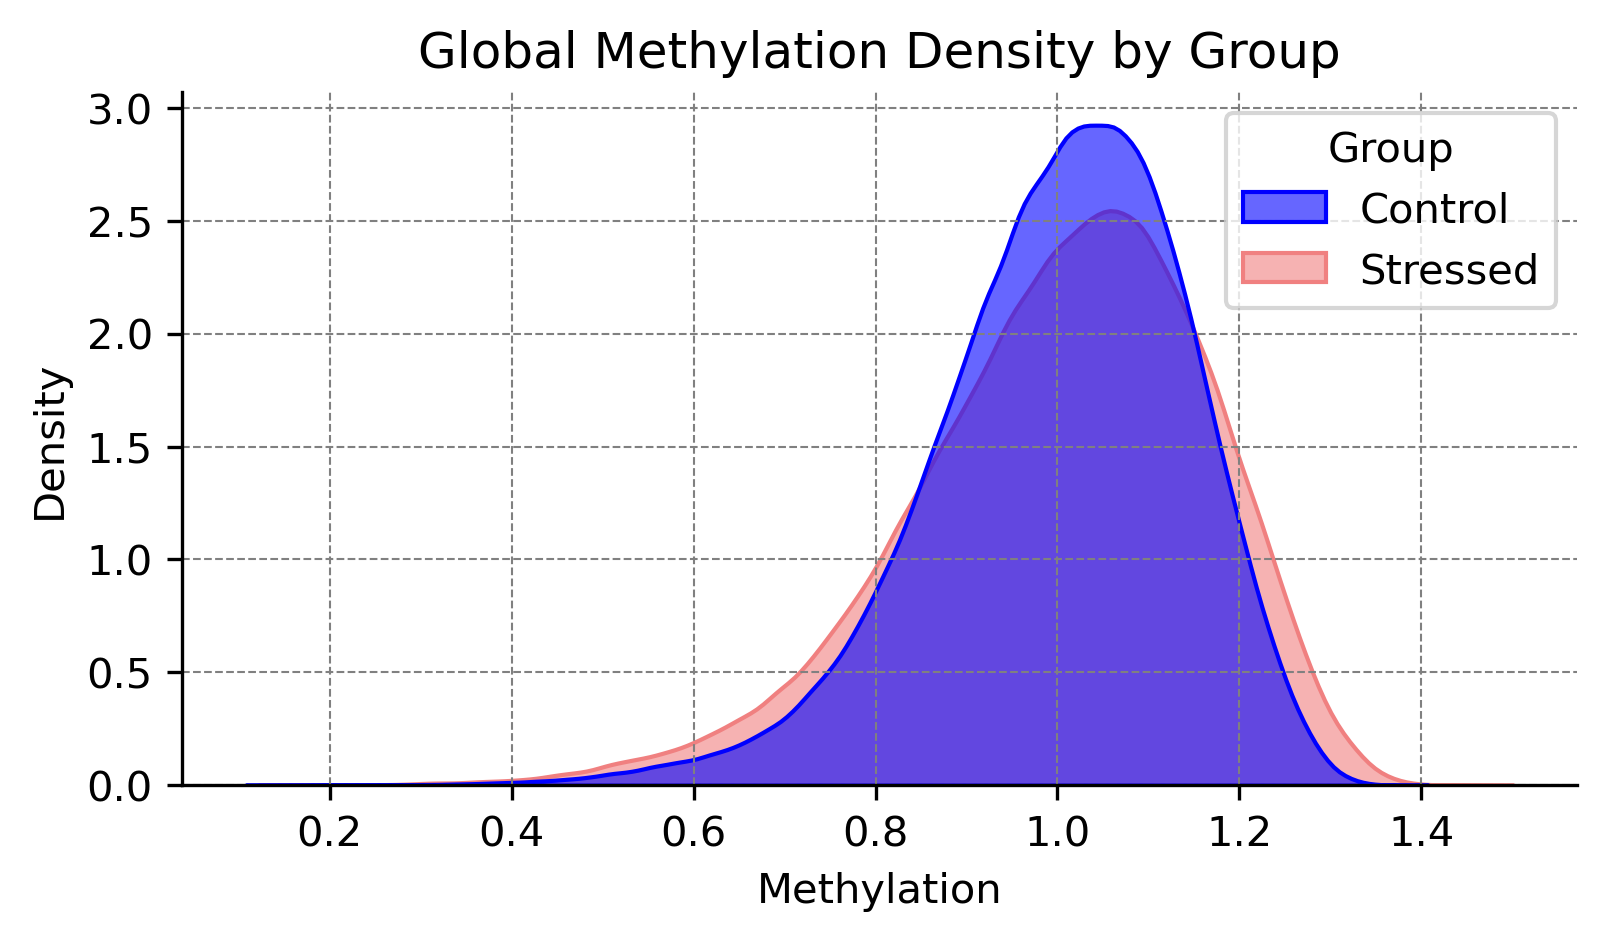

In [30]:
# denisty plot, global methylation per features across indivdiduals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os

# 1. Extract cell-by-feature matrix
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X  # shape: (cells, features)

# 2. Get group labels per cell
group_labels = adata.obs['Group'].values
print("X shape:", X.shape)
print("Group label shape:", group_labels.shape)

# 3. Build long-format DataFrame with one row per (cell, feature)
df_long = pd.DataFrame(X)
df_long['Group'] = group_labels
df_long = df_long.melt(id_vars='Group', var_name='Feature', value_name='Methylation')

# 4. Compute t-test across all features (flattened)
control_vals = df_long[df_long['Group'] == 'Control']['Methylation']
stress_vals = df_long[df_long['Group'] == 'Stressed']['Methylation']
# stat, pval = ttest_ind(control_vals, stress_vals, equal_var=False)
# print(f"t-test p-value: {pval:.3e}")

# 5. Custom color palette
palette = {'Control': 'blue', 'Stressed': 'lightcoral'}

# 6. Plot density plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.kdeplot(
    data=df_long,
    x='Methylation',
    hue='Group',
    fill=True,
    common_norm=False,
    palette=palette,
    alpha=0.6,
    linewidth=1,
    ax=ax
)

# # Annotate with p-value
# ax.text(
#     0.5, 1.05, f'p = {pval:.2e}', transform=ax.transAxes,
#     ha='center', va='bottom', fontsize=10, fontweight='bold'
# )

ax.set_title('Global Methylation Density by Group')
ax.grid(linewidth=0.5, color='gray', linestyle='--')
sns.despine(ax=ax)

# Optional: Save the figure
os.makedirs("violin_globalmeth", exist_ok=True)
#fig.savefig("violin_globalmeth/density_feature_Globmethylation_per_group.png", bbox_inches='tight')


In [12]:
adata.var['CGN_dispersion'].min()


-2.2804336600406607

X shape: (46, 23803)
Group label shape: (46,)


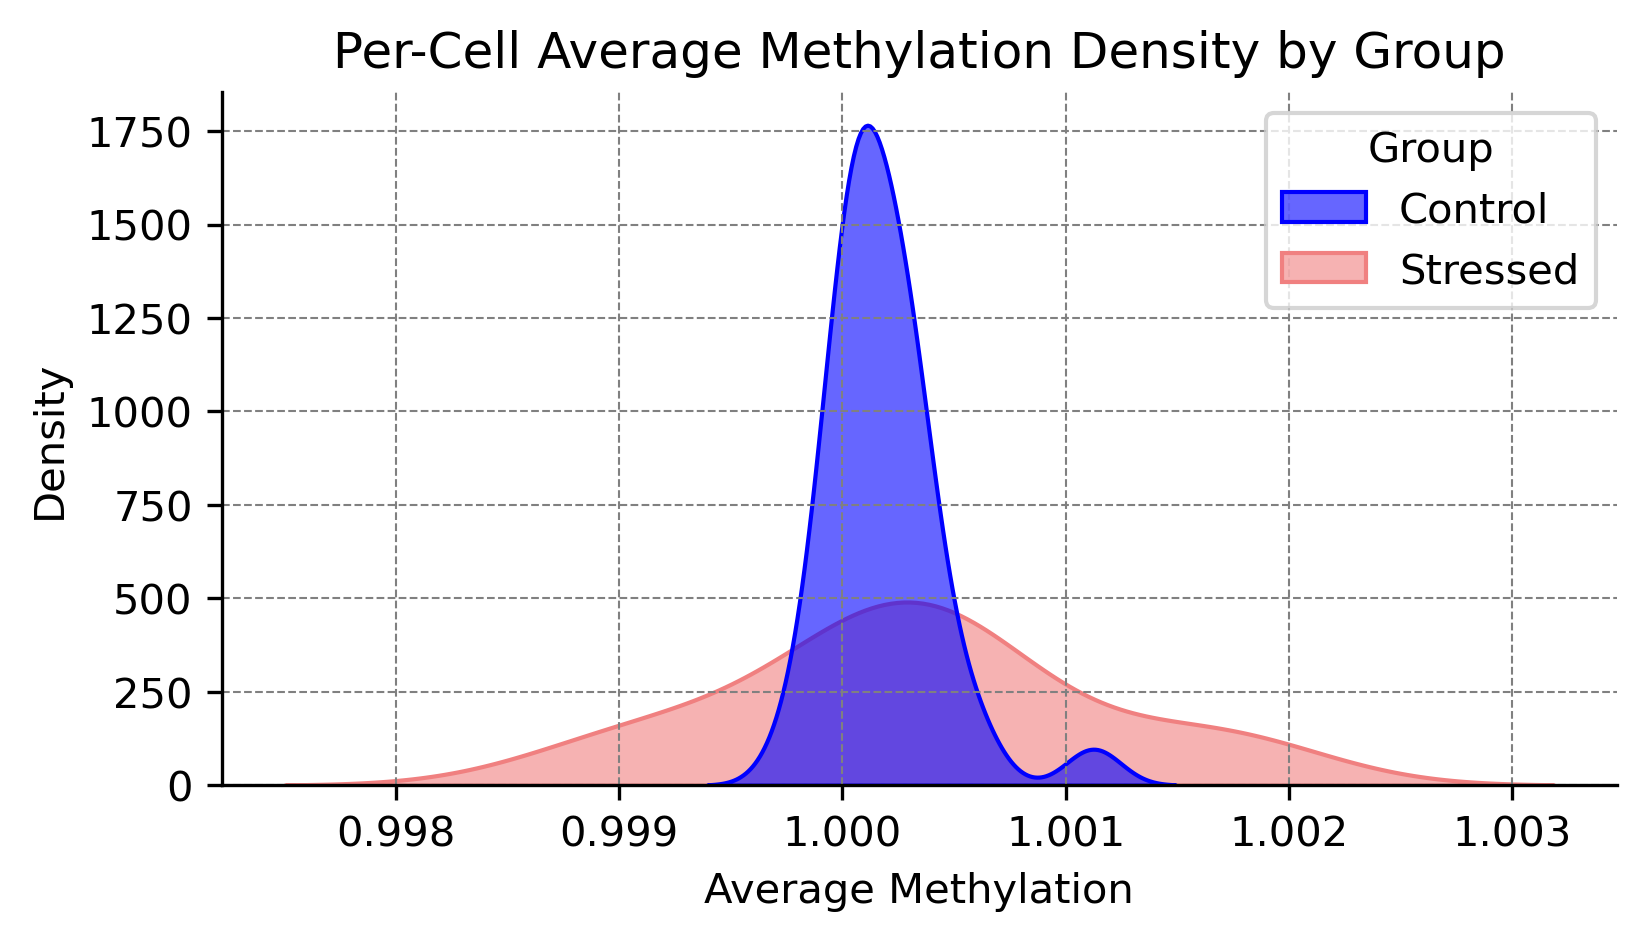

In [29]:
#average methylation of features per cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os

# 1. Extract cell-by-feature matrix
X = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X  # shape: (cells, features)

# 2. Get group labels per cell
group_labels = adata.obs['Group'].values
print("X shape:", X.shape)
print("Group label shape:", group_labels.shape)

# 3. Compute per-cell average methylation across all features
cell_avg_methylation = X.mean(axis=1)

# 4. Build DataFrame: one row per cell, with group and average methylation
df = pd.DataFrame({
    'Average_Methylation': cell_avg_methylation,
    'Group': group_labels
})

# 5. Compute t-test between groups
control_vals = df[df['Group'] == 'Control']['Average_Methylation']
stress_vals = df[df['Group'] == 'Stressed']['Average_Methylation']
# stat, pval = ttest_ind(control_vals, stress_vals, equal_var=False)
# print(f"t-test p-value: {pval:.3e}")

# 6. Custom color palette
palette = {'Control': 'blue', 'Stressed': 'lightcoral'}

# 7. Plot density plot
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

sns.kdeplot(
    data=df,
    x='Average_Methylation',
    hue='Group',
    fill=True,
    common_norm=False,
    palette=palette,
    alpha=0.6,
    linewidth=1,
    ax=ax
)

# # Annotate with p-value
# ax.text(
#     0.5, 1.05, f'p = {pval:.2e}', transform=ax.transAxes,
#     ha='center', va='bottom', fontsize=10, fontweight='bold'
# )

ax.set_title('Per-Cell Average Methylation Density by Group')
ax.set_xlabel('Average Methylation')
ax.set_ylabel('Density')
ax.grid(linewidth=0.5, color='gray', linestyle='--')
sns.despine(ax=ax)

# 8. Save figure
os.makedirs("violin_globalmeth", exist_ok=True)
fig.savefig("violin_globalmeth/density_avg_methylation_per_cell_by_group.png", bbox_inches='tight')


In [27]:
adata.var['CGN_mean']

chrom100k
chr1_0                          0.881746
chr1_2                          1.020762
chr1_3                          0.915400
chr1_4                          0.889420
chr1_5                          0.852483
                                  ...   
chrX_1529                       0.654831
chrX_1530                       0.658923
chrX_1531                       0.717330
chrX_1532                       0.671470
chrX_NW_021160383v1_random_0    0.952529
Name: CGN_mean, Length: 23803, dtype: float64